In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
import os
os.getcwd()

'C:\\Users\\USER'

In [3]:
os.chdir('Downloads')

In [4]:
df = pd.read_csv('train.csv')
df2 = pd.read_csv('test.csv')
df.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,Ford,F-150 Lariat,2018,74349,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,Yes,11000
1,1,BMW,335 i,2007,80000,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported,Yes,8250
2,2,Jaguar,XF Luxury,2009,91491,Gasoline,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Purple,Beige,None reported,Yes,15000
3,3,BMW,X7 xDrive40i,2022,2437,Hybrid,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Gray,Brown,None reported,Yes,63500
4,4,Pontiac,Firebird Base,2001,111000,Gasoline,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,A/T,White,Black,None reported,Yes,7850


In [5]:
df.tail()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
54268,54268,BMW,X6 xDrive50i,2017,29000,Gasoline,445.0HP 4.4L 8 Cylinder Engine Gasoline Fuel,8-Speed A/T,White,Brown,None reported,Yes,29000
54269,54269,Audi,A4 2.0T Premium,2015,94634,E85 Flex Fuel,220.0HP 2.0L 4 Cylinder Engine Flex Fuel Capab...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,6500
54270,54270,Porsche,Cayenne S,2013,40989,Gasoline,420.0HP 3.6L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,Black,At least 1 accident or damage reported,Yes,18950
54271,54271,Porsche,911 Carrera 4 GTS,2023,1518,Gasoline,4.0L H6 24V GDI DOHC,8-Speed Automatic with Auto-Shift,Beige,Brown,None reported,Yes,194965
54272,54272,Audi,A5 Sportback S line Premium Plus,2021,35000,Hybrid,261.0HP 2.0L 4 Cylinder Engine Gasoline/Mild E...,8-Speed A/T,Black,Black,None reported,Yes,37499


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54273 entries, 0 to 54272
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            54273 non-null  int64 
 1   brand         54273 non-null  object
 2   model         54273 non-null  object
 3   model_year    54273 non-null  int64 
 4   milage        54273 non-null  int64 
 5   fuel_type     54273 non-null  object
 6   engine        54273 non-null  object
 7   transmission  54273 non-null  object
 8   ext_col       54273 non-null  object
 9   int_col       54273 non-null  object
 10  accident      54273 non-null  object
 11  clean_title   54273 non-null  object
 12  price         54273 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 5.4+ MB


In [7]:
df.columns

Index(['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price'],
      dtype='object')

In [8]:
df.isnull().sum()

id              0
brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
price           0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.dtypes

id               int64
brand           object
model           object
model_year       int64
milage           int64
fuel_type       object
engine          object
transmission    object
ext_col         object
int_col         object
accident        object
clean_title     object
price            int64
dtype: object

In [11]:
df.describe()

,id,model_year,milage,price
count,54273.000000,54273.000000,54273.000000,5.427300e+04
mean,27136.000000,2015.091979,72746.175667,3.921844e+04
std,15667.409917,5.588909,50469.490448,7.282634e+04
min,0.000000,1974.000000,100.000000,2.000000e+03
25%,13568.000000,2012.000000,32268.000000,1.550000e+04
50%,27136.000000,2016.000000,66107.000000,2.800000e+04
75%,40704.000000,2019.000000,102000.000000,4.500000e+04
max,54272.000000,2024.000000,405000.000000,2.954083e+06


In [12]:
df.nunique()

id              54273
brand              53
model            1827
model_year         34
milage           3212
fuel_type           7
engine           1061
transmission       46
ext_col           260
int_col           124
accident            2
clean_title         1
price            1481
dtype: int64

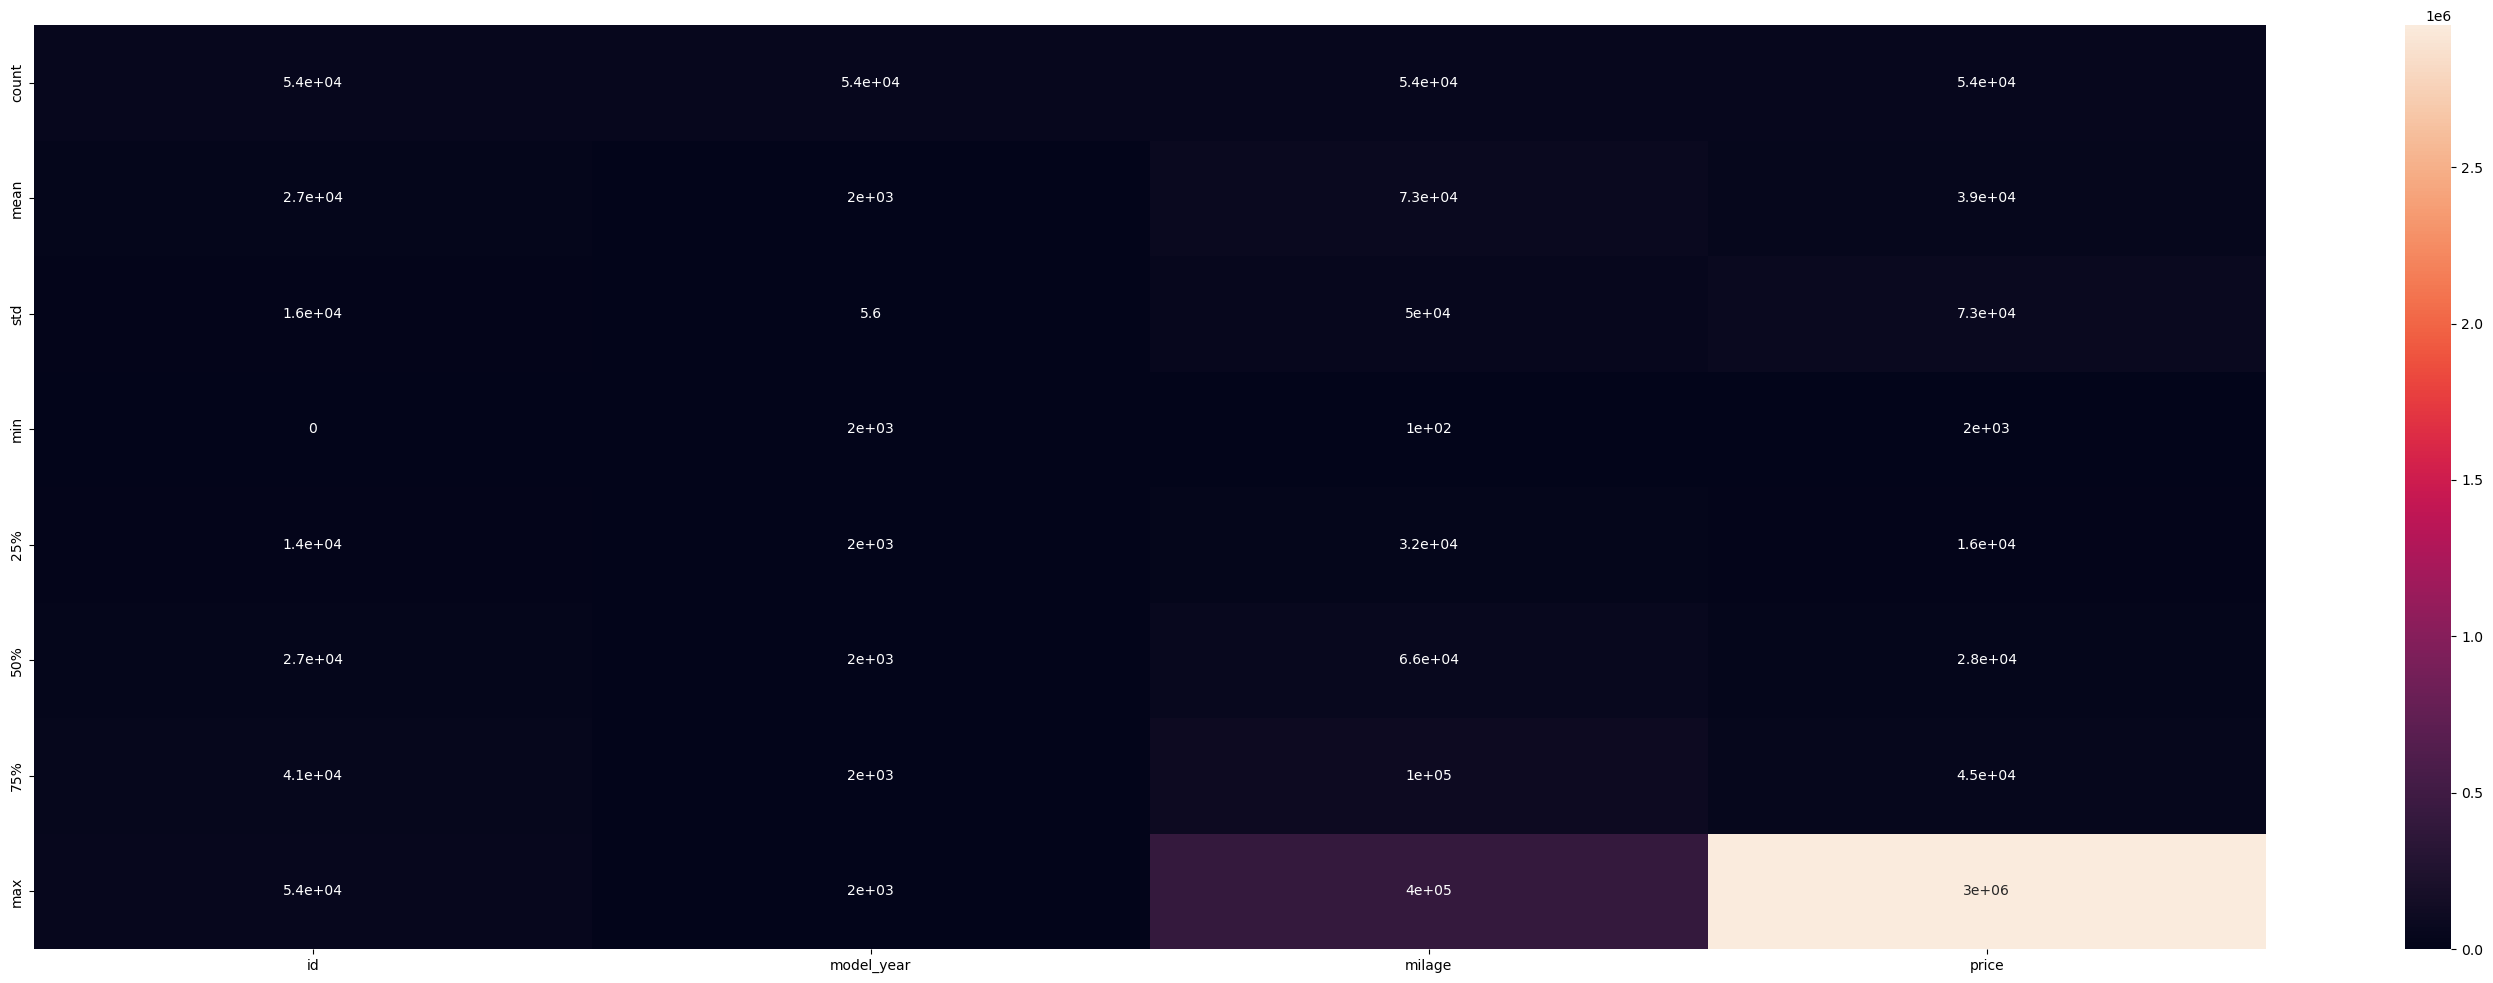

In [13]:
plt.figure(figsize =(36, 12))
sns.heatmap(df.describe(), annot=True)
plt.show()

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


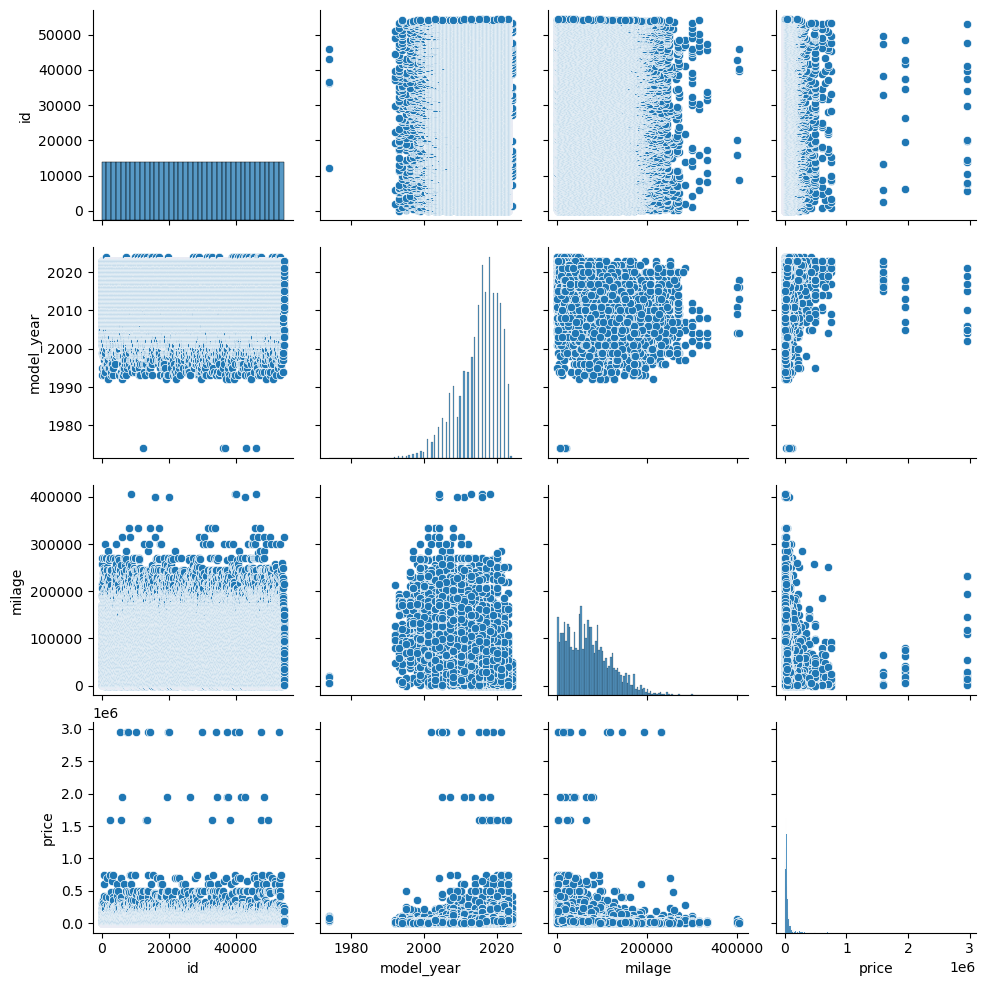

In [14]:
sns.pairplot(df)

In [15]:
df.min()

id                                                   0
brand                                            Acura
model                                124 Spider Abarth
model_year                                        1974
milage                                             100
fuel_type                                       Diesel
engine                      1.2L I3 12V GDI DOHC Turbo
transmission                               1-Speed A/T
ext_col                           Agate Black Metallic
int_col                                      AMG Black
accident        At least 1 accident or damage reported
clean_title                                        Yes
price                                             2000
dtype: object

In [16]:
df.max()

id                      54272
brand                   Volvo
model                 xB Base
model_year               2024
milage                 405000
fuel_type                   –
engine                      –
transmission                –
ext_col                     –
int_col                     –
accident        None reported
clean_title               Yes
price                 2954083
dtype: object

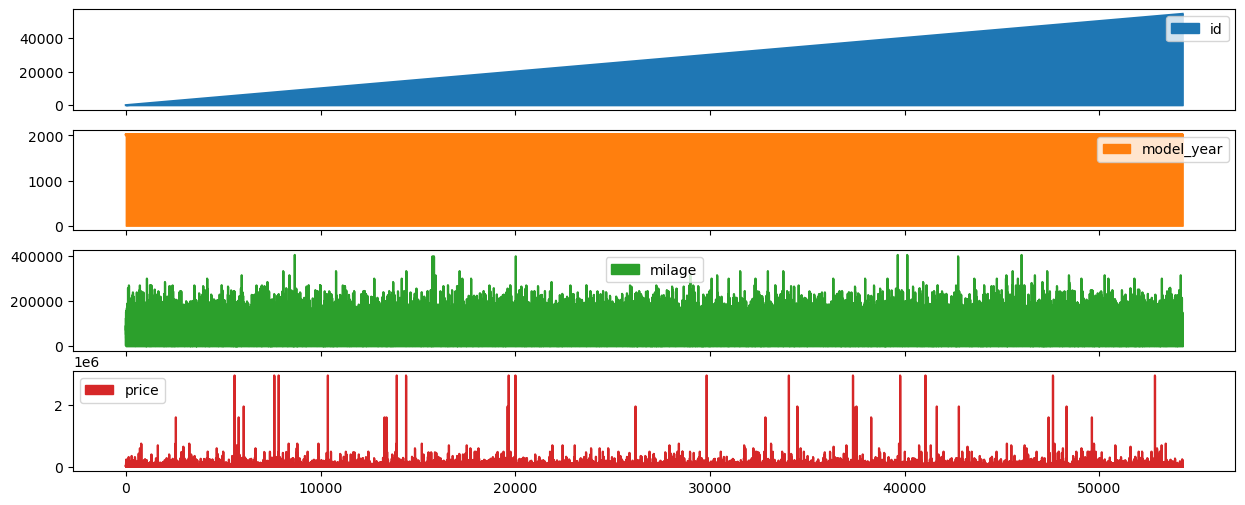

In [17]:
area = df.plot.area(figsize= (15, 6), subplots=True)

In [18]:
df.dtypes

id               int64
brand           object
model           object
model_year       int64
milage           int64
fuel_type       object
engine          object
transmission    object
ext_col         object
int_col         object
accident        object
clean_title     object
price            int64
dtype: object

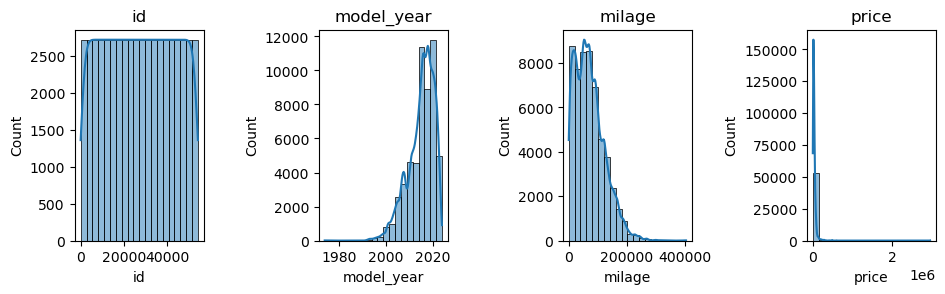

In [19]:
numerical_features = ['id', 'model_year', 'milage', 'price']

plt.figure(figsize=(12, 8))
for feature in numerical_features:
    plt.subplot(3, 5, numerical_features.index(feature) + 1)
    sns.histplot(data=df[feature], bins=20, kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

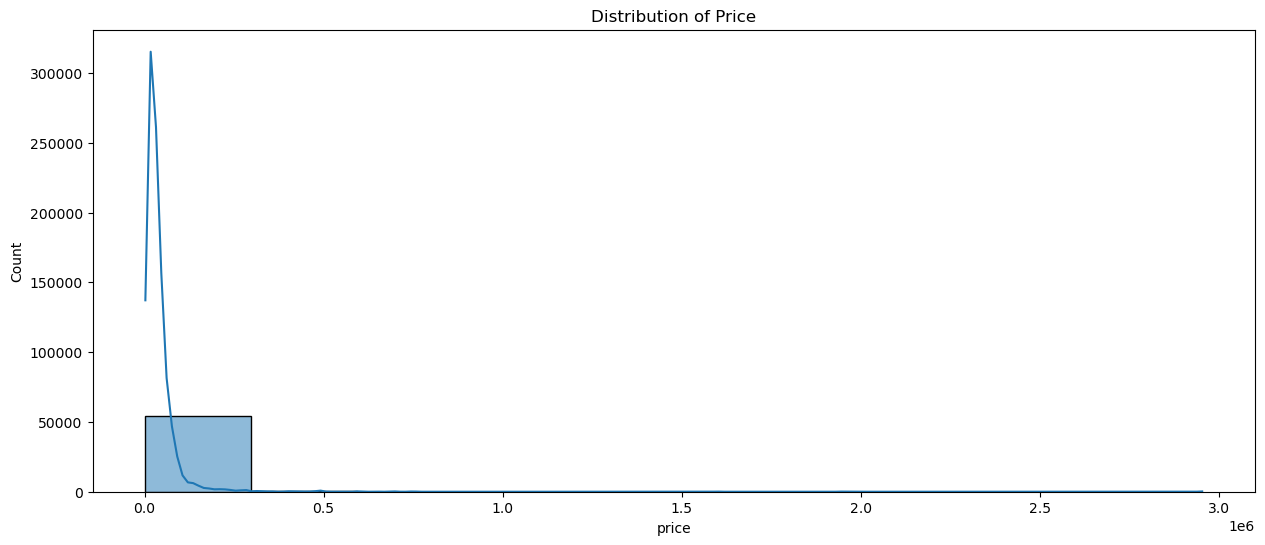

In [20]:
# Price Analysis
plt.figure(figsize=(15, 6))
sns.histplot(data=df['price'], bins=10, kde=True)
plt.title('Distribution of Price')
plt.show()

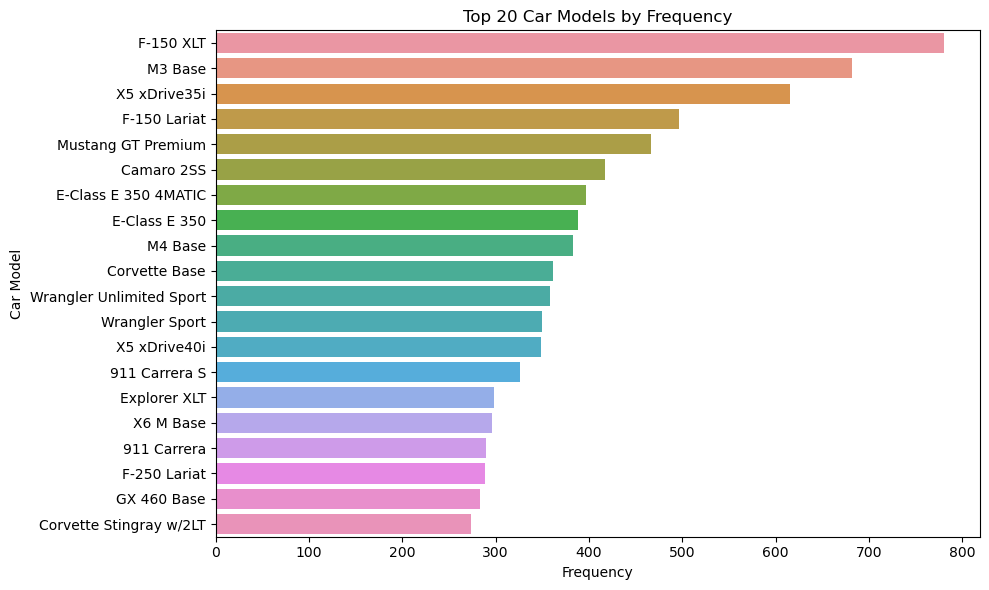

In [21]:
n = 20  # Number of top car models to plot
top_car_models = df['model'].value_counts().head(n)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_car_models.values, y=top_car_models.index)
plt.title(f'Top {n} Car Models by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()

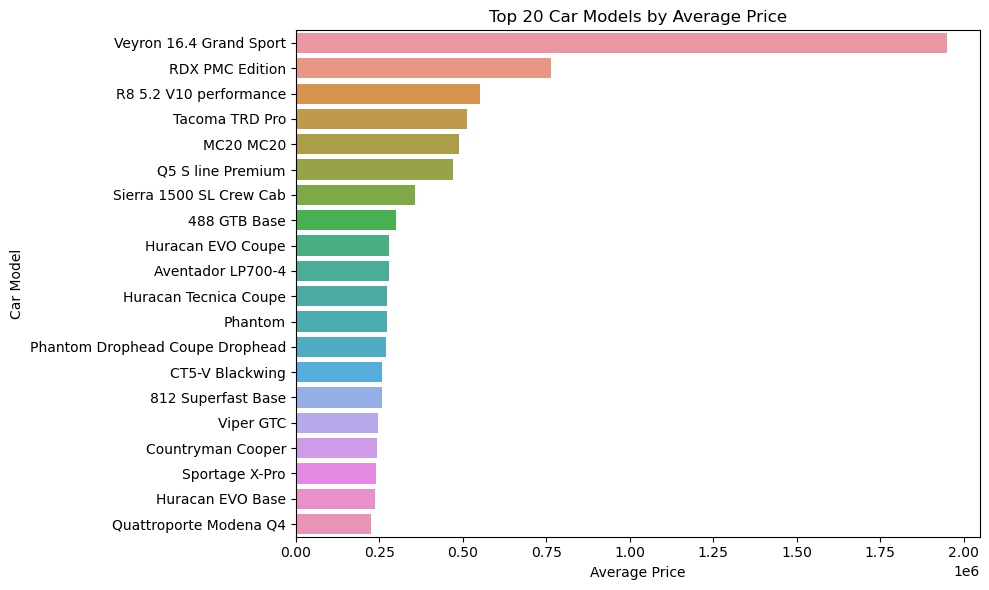

In [22]:
avg_prices_by_car = df.groupby('model')['price'].mean().sort_values(ascending=False)

# Plot top N car models by average price
n = 20  # Number of top car models to plot
top_car_models = avg_prices_by_car.head(n)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_car_models.values, y=top_car_models.index)
plt.title(f'Top {n} Car Models by Average Price')
plt.xlabel('Average Price')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()

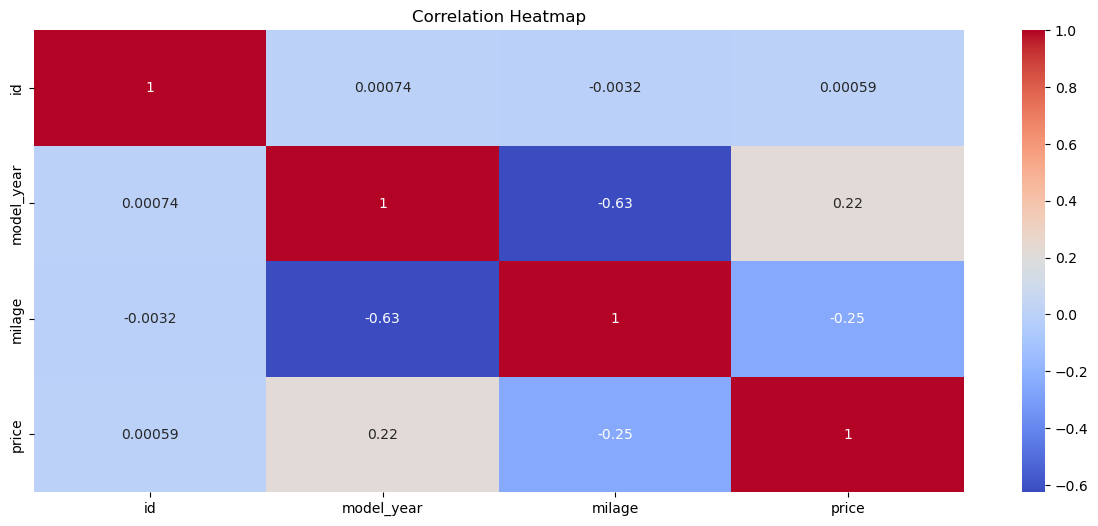

In [23]:
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(15, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [24]:
df['brand'] = df['model'].apply(lambda x: x.split(' ')[0])
df['model'] = df['model'].apply(lambda x: ' '.join(x.split(' ')[1:]))

# Define categorical and numerical columns
categorical_columns = ['brand', 'model', 'fuel_type', 'engine', 'transmission', 'ext_col', 'int_col', 'accident', 'clean_title']
numerical_columns = ['id', 'model_year', 'milage', 'price']

# Encoding categorical variables
label_encoder = LabelEncoder()
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Feature engineering
for column in numerical_columns:
    df[f'{column}_squared'] = df[column] ** 2

# Feature scaling
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [25]:
X = df.drop(['price', 'model'], axis = 1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Model training
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [27]:
y_pred = model.predict(X_test)

In [28]:
y_pred

array([ 0.57161066,  0.76332359, -0.319871  , ...,  0.66710561,
       -0.06950731,  0.00247835])

In [34]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2_square = r2_score(y_test,y_pred)
print(f" R-squared: {r2_square}")
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

 R-squared: 0.61101164088981
Mean Squared Error: 0.21552292412712382
Root Mean Squared Error: 0.4642444659089905
